In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('./impl/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from impl.implementation import *
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import KFold

Using TensorFlow backend.
/home/ttran/.conda/envs/adaptive_confound_py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Dataset 1: Iris dataset - 3 classes

In [2]:
X_train, y_train, X_test, y_test = load_iris(split_ratio=0.8)

In [3]:
k=4
kf = KFold(n_splits = k)
res = []
dnn = None
loss = []
acc = []
val_loss = []
val_acc = []
for train_ind, test_ind in kf.split(X_train):
    X_tr, X_val = X_train[train_ind], X_train[test_ind]
    y_tr, y_val = y_train[train_ind], y_train[test_ind]
    dnn = DenseNeuralNetwork(10) #10 units per hidden layer
    dnn.fit(X_tr,y_tr,epochs=200,learning_rate=0.01,batch_size=16,iterations=120,val_data=(X_val,y_val))
    
    hist = dnn.history
    loss.append(hist['loss'])
    acc.append(hist['acc'])
    val_acc.append(hist['val_acc'])
    val_loss.append(hist['val_loss'])

In [4]:
loss, acc, val_loss, val_acc = np.average(loss,axis=0), np.average(acc,axis=0), np.average(val_loss,axis=0), np.average(val_acc,axis=0)

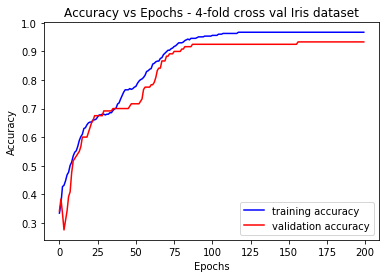

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot()
plt.plot(acc,'b',label="training accuracy")
plt.plot(val_acc,'r',label = "validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Epochs - 4-fold cross val Iris dataset')
plt.legend()
plt.savefig('data1_acc')

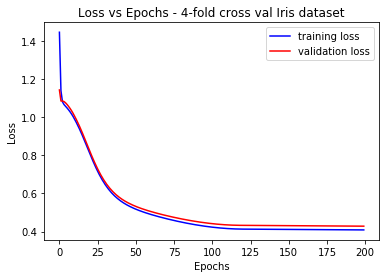

In [6]:
#plt.plot()
plt.plot(loss,'b',label="training loss")
plt.plot(val_loss,'r',label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs Epochs - 4-fold cross val Iris dataset')
plt.legend()
plt.savefig('data1_loss')

In [7]:
res = dnn.evaluate(X_test,y_test)
print("Testing on final test set yields {} acc and {} loss".format(res[0],res[1]))

Testing on final test set yields 0.9666666666666667 acc and 0.42450426678531267 loss


# Dataset 2: cifar10 with subset of 3 classes from hw1

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(cifar10.load_data)
dnn = DenseNeuralNetwork(512)
dnn.fit(X_train,y_train,epochs=100,learning_rate=0.00001,batch_size=512,val_data=(X_val,y_val),iterations=60)

/home/ttran/577-temporary/hw2/impl/implementation.py:51: RuntimeWarning: overflow encountered in exp
  """


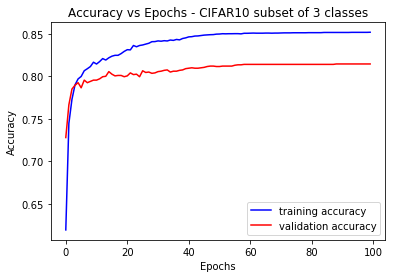

In [10]:
hist = dnn.history
plt.plot(hist['acc'],'b',label="training accuracy")
plt.plot(hist['val_acc'],'r',label = "validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Epochs - CIFAR10 subset of 3 classes')
plt.legend()
plt.savefig('data2_acc')

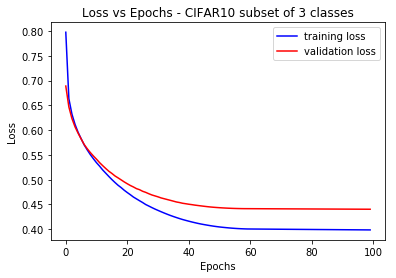

In [11]:
plt.plot(hist['loss'],'b',label="training loss")
plt.plot(hist['val_loss'],'r',label = "validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss vs Epochs - CIFAR10 subset of 3 classes')
plt.legend()
plt.savefig('data2_loss')

In [14]:
res = dnn.evaluate(X_test,y_test)
print("Testing on final test set yields {} acc and {} loss".format(res[0],res[1]))

Testing on final test set yields 0.8355 acc and 0.4295226323065068 loss


/home/ttran/577-temporary/hw2/impl/implementation.py:51: RuntimeWarning: overflow encountered in exp
  """
